# Capstone 2: Preprocessing

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# read data
data = pd.read_csv('exploratory_data_analysis.csv')
print(data.head())

   Unnamed: 0  tree_id  tree_dbh curb_loc health       spc_common steward  \
0           0   180683         3   OnCurb   Fair        red maple    None   
1           1   200540        21   OnCurb   Fair          pin oak    None   
2           2   204026         3   OnCurb   Good      honeylocust    1or2   
3           3   204337        10   OnCurb   Good      honeylocust    None   
4           4   189565        21   OnCurb   Good  American linden    None   

  guards  sidewalk problems  ... root_other trunk_wire trnk_light trnk_other  \
0   None  NoDamage     None  ...         No         No         No         No   
1   None    Damage   Stones  ...         No         No         No         No   
2   None    Damage     None  ...         No         No         No         No   
3   None    Damage   Stones  ...         No         No         No         No   
4   None    Damage   Stones  ...         No         No         No         No   

  brch_light brch_shoe brch_other   borough   latitude  

In [3]:
# drop unnamed first column
data = data.drop(data.columns[0], axis=1)

# drop problems column
data = data.drop('problems', axis=1)

# set tree_id as index
data = data.set_index('tree_id')

## Scale numeric variable

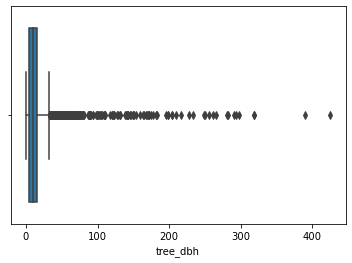

In [4]:
# check tree_dbh distribution
sns.boxplot(x='tree_dbh', data=data)
plt.show()

* Many outliers in upper range

In [5]:
# filter top 5% of tree_dbh
data = data[data.tree_dbh < data.tree_dbh.quantile(0.95)]

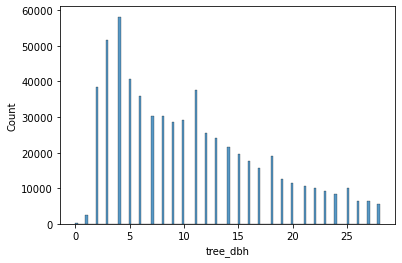

In [6]:
# re-check tree_dbh distribution
sns.histplot(x='tree_dbh', data=data)
plt.show()

In [7]:
# scale tree_dbh 
scaler = StandardScaler()
data.tree_dbh = scaler.fit_transform(data.tree_dbh.values.reshape(-1,1))

### Question:
* I'm not sure if this is how to scale a single feature instead of all the numeric variables in a dataframe?
* What do I do with latitude/longitude?

## Label encode target variable

In [8]:
# define target and explanatory variables
y = data.health
X = data.drop(['health'], axis=1)

In [9]:
# label encode health
le = LabelEncoder()
y = le.fit_transform(y)

### Question:
* Is it better to label encode the target variable before one-hot encoding the rest of the categorical variable?

## One hot encode categorical variables

In [10]:
# Check dtypes
X.dtypes

tree_dbh      float64
curb_loc       object
spc_common     object
steward        object
guards         object
sidewalk       object
root_stone     object
root_grate     object
root_other     object
trunk_wire     object
trnk_light     object
trnk_other     object
brch_light     object
brch_shoe      object
brch_other     object
borough        object
latitude      float64
longitude     float64
dtype: object

In [11]:
# Encode categorical variables
cat = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=cat)

In [12]:
# Check encoding
X.head()

,tree_dbh,latitude,longitude,curb_loc_OffsetFromCurb,curb_loc_OnCurb,spc_common_'Schubert' chokecherry,spc_common_American beech,spc_common_American elm,spc_common_American hophornbeam,spc_common_American hornbeam,...,brch_light_Yes,brch_shoe_No,brch_shoe_Yes,brch_other_No,brch_other_Yes,borough_Bronx,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_Staten Island
tree_id,,,,,,,,,,,,,,,,,,,,,
180683,-1.101181,40.723092,-73.844215,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
200540,1.538217,40.794111,-73.818679,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
204026,-1.101181,40.717581,-73.936608,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
204337,-0.074749,40.713537,-73.934456,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
189565,1.538217,40.666778,-73.975979,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0


## Split training/testing data

In [13]:
# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

### Question: 
* Should I stratify the split because of the imbalanced categories? Or is there a better way to address this?

In [14]:
# Check shape
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(494848, 170) (123713, 170)
(494848,) (123713,)


### Question:
* Is there any more preprocessing I can do?